In [641]:
# Import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
import pickle
import json
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.model_selection import cross_val_score

In [642]:
# load dataset
df = pd.read_csv("data.csv")
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [643]:
# Remove some Not required column for status classification
df = df.drop(columns=["sl_no","etest_p","salary"])
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,Mkt&Fin,74.49,Placed
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,Mkt&Fin,53.62,Placed
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,Mkt&Fin,69.72,Placed
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,Mkt&HR,60.23,Placed


In [644]:
df = df.drop_duplicates()

In [645]:
df.shape

(215, 12)

## coumn info:
<pre>
gender: Gender of the candidate (male/female)
ssc_b: senior secondary board
ssc_p: senior secondary percentage scored
hsc_b: higher secondary board
hsc_p: higher secondary percentage scored
hsc_s: higher secondary subject
degree_p: percentage scored in degree/graduation
etest_p: entrance test percentage scored
mba_p: mba percentage scored
specialization: mba specialization
workex: work experience
status: placed or not placed (target variable)
</pre>

In [646]:
df.info()
# No missing data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 0 to 214
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   specialisation  215 non-null    object 
 10  mba_p           215 non-null    float64
 11  status          215 non-null    object 
dtypes: float64(4), object(8)
memory usage: 21.8+ KB


In [647]:
df.describe()

,ssc_p,hsc_p,degree_p,mba_p
count,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,62.278186
std,10.827205,10.897509,7.358743,5.833385
min,40.890000,37.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,57.945000
50%,67.000000,65.000000,66.000000,62.000000
75%,75.700000,73.000000,72.000000,66.255000
max,89.400000,97.700000,91.000000,77.890000


## Visualization


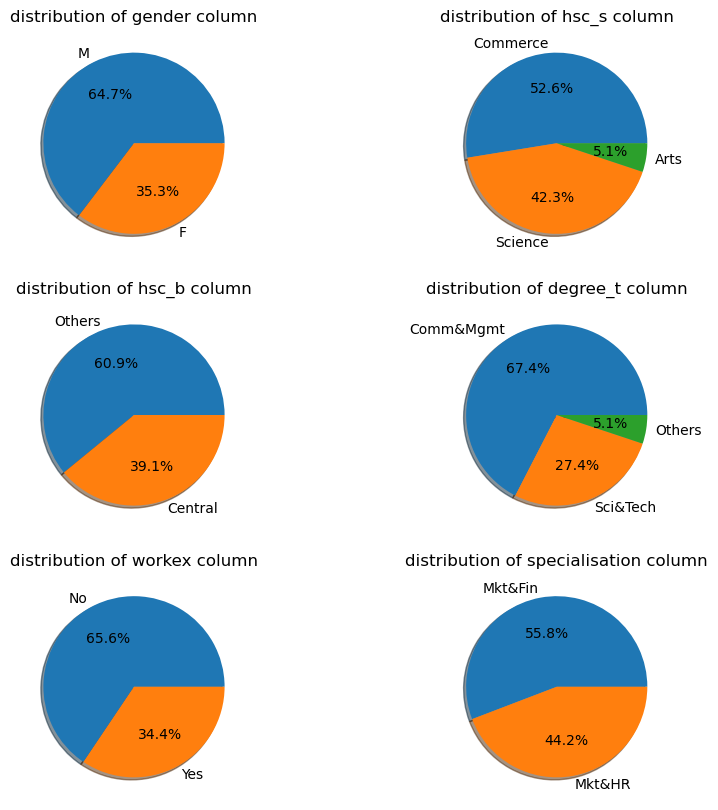

In [648]:
# distribution of categorical columns
fig1 = plt.figure(figsize=(10,10))
list = ["gender","hsc_s","hsc_b","degree_t","workex","specialisation"]
for i in range(len(list)):
    temp = df[list[i]].value_counts()
    ax = fig1.add_subplot(3,2,i+1)
    ax.set_title(f'distribution of {list[i]} column',fontsize=12,)
    ax.pie(temp.values,labels=temp.index,autopct="%0.1f%%",shadow=0.1)
plt.show()

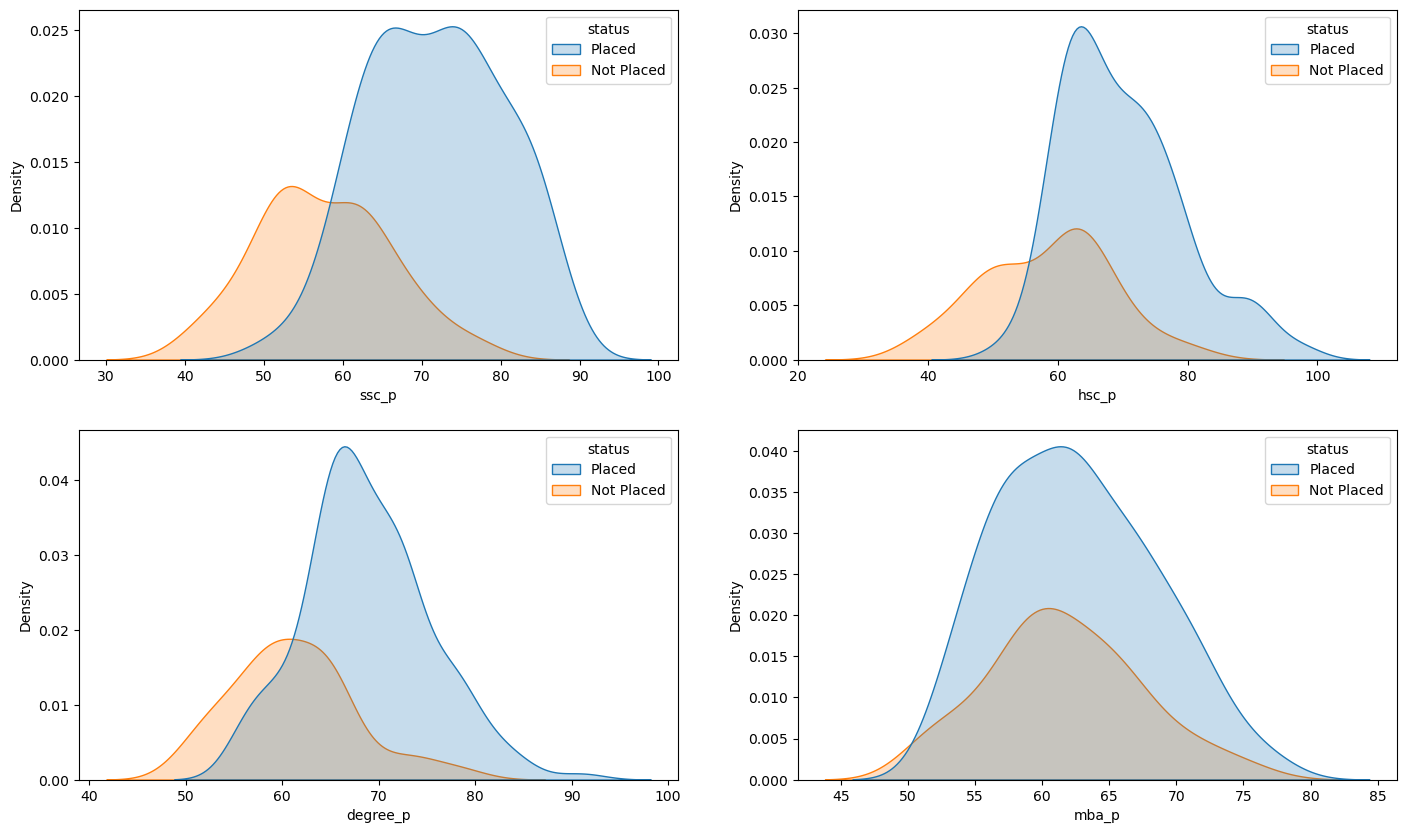

In [649]:
# distribution of numerical columns.
fig, axes = plt.subplots(2,2,figsize=(17,10))
sns.kdeplot(data=df,x="ssc_p",hue="status",fill=True,ax=axes[0,0])
sns.kdeplot(data=df,x="hsc_p",hue="status",fill=True,ax =axes[0,1])
sns.kdeplot(data=df,x="degree_p",hue="status",fill=True,ax =axes[1,0])
sns.kdeplot(data=df,x="mba_p",hue="status",fill=True,ax =axes[1,1])
plt.show()

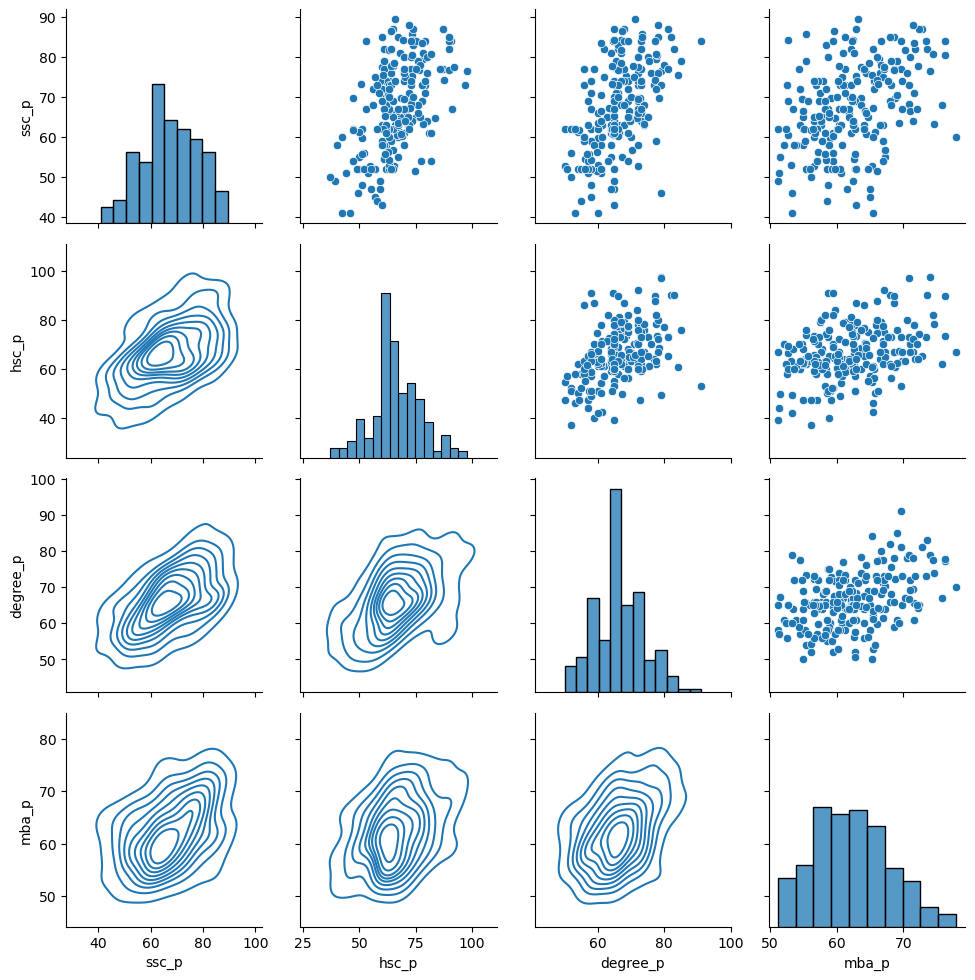

In [650]:
# correlation between all the marks
obj = sns.PairGrid(data=df[["ssc_p","hsc_p","degree_p","mba_p"]])
obj.map_diag(sns.histplot)
obj.map_upper(sns.scatterplot)
obj.map_lower(sns.kdeplot)
plt.show()

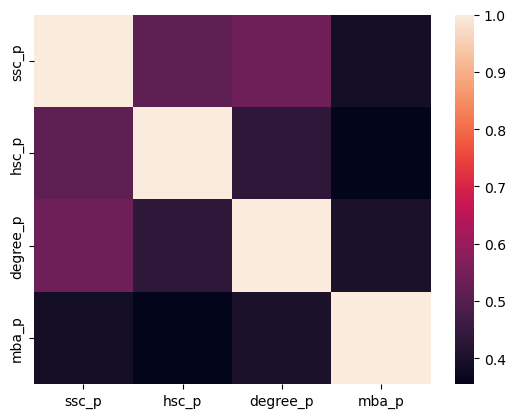

In [651]:
sns.heatmap(df.corr())
plt.show()

## EDA

C:\Users\khush\AppData\Local\Temp\ipykernel_14116\2794220655.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = df.groupby("status")["ssc_p","hsc_p","degree_p","mba_p"].mean()


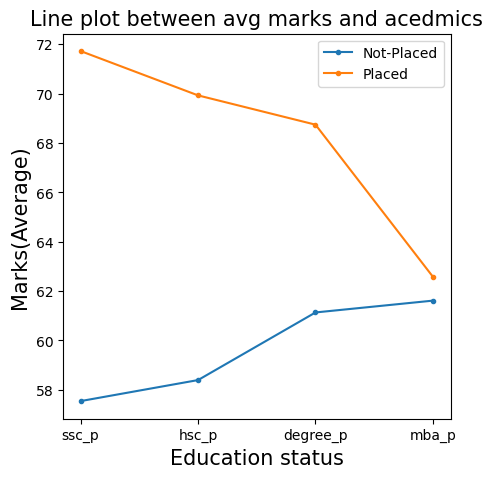

In [652]:
# 1.) corelation between marks and placement
temp = df.groupby("status")["ssc_p","hsc_p","degree_p","mba_p"].mean()
fig1 = plt.figure(figsize=(5,5))
ax1 = fig1.add_subplot(1,1,1)
plot1 = ax1.plot(temp.columns,temp.iloc[0],label="Not-Placed",marker=".")
plot2 = ax1.plot(temp.columns,temp.iloc[1],label="Placed",marker=".")
ax1.set_title('Line plot between avg marks and acedmics',fontsize=15) 
ax1.set_xlabel('Education status',fontsize=15)    
ax1.set_ylabel('Marks(Average)',fontsize=15)
ax1.legend()
plt.show()

The above plot clerely represt marks in class is a important feature for placement.

In [653]:
# 2.) corelation between workexperience and placement status.
df.groupby("status")["workex"].value_counts()

status      workex
Not Placed  No        57
            Yes       10
Placed      No        84
            Yes       64
Name: workex, dtype: int64

In 74 students who have work experience 64 (which is 86.48 percent) get place. and 141 student who do not have any work experience only 57(which is 40.4 percent) get placed. Means their is Positive high correlation between workex and placement.

##  Preprocessing

In [654]:
input = df.drop(columns=["status"])
input

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,specialisation,mba_p
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,Mkt&HR,58.80
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,Mkt&Fin,66.28
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,Mkt&Fin,57.80
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,Mkt&HR,59.43
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,Mkt&Fin,55.50
...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,Mkt&Fin,74.49
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,Mkt&Fin,53.62
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,Mkt&Fin,69.72
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,Mkt&HR,60.23


In [655]:
x_train,x_test,y_train,y_test = train_test_split(input,df["status"],test_size=0.2,random_state=42)
y_train

93     Not Placed
84         Placed
95         Placed
137        Placed
210        Placed
          ...    
106    Not Placed
14     Not Placed
92         Placed
179    Not Placed
102        Placed
Name: status, Length: 172, dtype: object

In [656]:
transformer = ColumnTransformer(
    [
        ("tnf1",OrdinalEncoder(categories=[["Arts","Commerce","Science"]]),["hsc_s"]),
        ("tnf2",OneHotEncoder(sparse=False, drop="first"),["gender","ssc_b","hsc_b","degree_t","specialisation","workex"])
    ],
    remainder = "passthrough"
)

In [657]:
x_train_encoded = transformer.fit_transform(x_train)
x_test_encoded = transformer.transform(x_test)
x_train_encoded

array([[ 1.  ,  1.  ,  0.  , ..., 62.  , 54.  , 55.41],
       [ 2.  ,  1.  ,  0.  , ..., 63.  , 70.  , 62.  ],
       [ 1.  ,  1.  ,  0.  , ..., 78.  , 65.  , 62.16],
       ...,
       [ 2.  ,  0.  ,  0.  , ..., 69.  , 66.  , 59.47],
       [ 2.  ,  0.  ,  0.  , ..., 64.  , 64.2 , 72.14],
       [ 1.  ,  0.  ,  1.  , ..., 61.  , 68.  , 61.31]])

In [658]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_encoded)
x_test_scaled = scaler.transform(x_test_encoded)
x_test_scaled.shape

(43, 12)

In [659]:
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

## Modelling

In [660]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression(solver='liblinear', penalty='l2')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [661]:
clfs = {
    'SVC' : svc,
    'KNN' : knc,  
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [662]:
def train_classifier(clf,x_train,y_train,X_test,y_test):
    clf.fit(x_train_scaled,y_train)
    y_pred = clf.predict(x_test_scaled)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [663]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf, x_train_encoded,y_train,x_test_encoded,y_test)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)    

C:\Users\khush\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [664]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'precision':precision_scores})

In [665]:
performance_df

,Algorithm,Accuracy,precision
0,SVC,0.790698,0.843750
1,KNN,0.790698,0.823529
2,DT,0.837209,0.900000
3,LR,0.883721,0.906250
4,RF,0.790698,0.805556
5,AdaBoost,0.790698,0.805556
6,ETC,0.767442,0.800000
7,GBDT,0.813953,0.848485
8,xgb,0.813953,0.828571


### Voting Classifier

In [666]:
from sklearn.ensemble import VotingClassifier
dtc = DecisionTreeClassifier()
lrc = LogisticRegression(solver='liblinear', penalty='l2')
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)
voting = VotingClassifier(estimators=[('lrc', lrc), ('abc', abc)],voting='soft')
voting.fit(x_train_scaled,y_train)
y_pred = voting.predict(x_test_scaled)
accuracy_score(y_test,y_pred)
# Approx Same

0.8604651162790697

### Making Pipeline

we have used random forest classifier because we can visualize our predication

In [667]:
# column encoding
trf1 = ColumnTransformer([
    ("ord_encode",OrdinalEncoder(categories=[["Arts","Commerce","Science"]]),["hsc_s"]),
    ("OneHotEncode",OneHotEncoder(sparse=False, drop="first"),["gender","ssc_b","hsc_b","degree_t","specialisation","workex"]),
#     ("labelencode",LabelEncoder())
],remainder="passthrough")
# scaling
trf2 = StandardScaler()

# model
trf3 = RandomForestClassifier(n_estimators=30,max_depth=None,max_samples=0.75,max_features=2)

pipe = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3)
])
pipe.fit(x_train,y_train)
pipe.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('ord_encode',
                                  OrdinalEncoder(categories=[['Arts', 'Commerce',
                                                              'Science']]),
                                  ['hsc_s']),
                                 ('OneHotEncode',
                                  OneHotEncoder(drop='first', sparse=False),
                                  ['gender', 'ssc_b', 'hsc_b', 'degree_t',
                                   'specialisation', 'workex'])]),
 'trf2': StandardScaler(),
 'trf3': RandomForestClassifier(max_features=2, max_samples=0.75, n_estimators=30)}

In [668]:
set_config(display="diagram")
pipe

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord_encode',
                                                  OrdinalEncoder(categories=[['Arts',
                                                                              'Commerce',
                                                                              'Science']]),
                                                  ['hsc_s']),
                                                 ('OneHotEncode',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['gender', 'ssc_b', 'hsc_b',
                                                   'degree_t', 'specialisation',
                                                   'workex'])])),
                ('trf2', StandardScaler()),
                ('trf3',
                 RandomForestClassifier(max_features=2, max_samples=0.75,
                                        n_estimators=30))])

In [669]:
y_pred = pipe.predict(x_test)
accuracy_score(y_test,y_pred)

0.813953488372093

In [670]:
#  cross validation
cross_val_score(pipe,x_train,y_train,cv=10).mean()

0.872549019607843

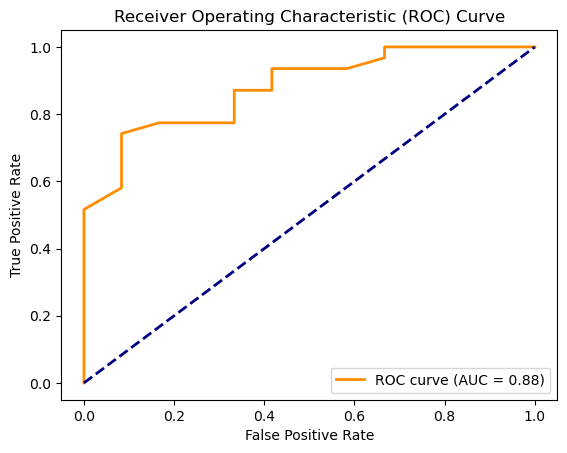

In [671]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
y_prob = pipe.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [672]:
# convert pipline to pickle
# with open("pipe.pkl",'wb') as f:
#     pickle.dump(pipe,f)

In [673]:
# dump column names into pickle file
# with open("columns.pkl","wb") as f:
#     pickle.dump(np.array(x_train.columns),f)